In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
import sys
sys.path.insert(0, '..')
from models import Classifier, WeightedMSE, FlatLoss
from utils import Metrics, find_threshold, DataSet, Logger

np.random.seed(42)

# Generating Toy Data
Generate signal mass from a uniform + gaussian distribution.

Generate background mass from a linear distribution $ ax + b $ (with $ a = \frac{1}{4} $ and $ b = \frac{1}{2} $ ) using inversion transform sampling.

Generate random gaussian variables uncorrelated with mass but slightly different for signal and background.

In [2]:
n_s = int(5e4)
n_b = int(5e4)
n_s_gauss_frac = 0.8

a = 1/4 
b = 1/2

u = np.random.uniform(0,1,n_s)
u_ = np.random.uniform(0,1,n_b)

m_b = - b/(a) + np.sqrt((b-a)**2 + 2*a*u)/(a)
m_s = np.concatenate([np.random.uniform(-1,1,n_s-int(n_s_gauss_frac*n_s)), 
                    np.random.normal(0.5,0.1,size=int(n_s_gauss_frac*n_s))])
m_t = -b/(a) + np.sqrt((b-a)**2 + 2*a*u_)/(a)
m_t.sort()

x_b,y_b  = np.random.multivariate_normal((0,0),[[1,0],[0,1]],size=n_b).T
x_s,y_s  = np.random.multivariate_normal((0,0),[[1,0],[0,1]],size=n_s).T
x_t,y_t  = np.random.multivariate_normal((0,0),[[1,0],[0,1]],size=n_b).T


z_b = np.random.normal(0,1,n_b)
z_s = np.random.normal(0.5,1,n_s)
z_t = np.random.normal(0,1,n_b)

In [3]:
x = np.concatenate([np.stack([m_s,m_s**2+2*m_s,x_s,y_s,z_s],axis=1),
                   np.stack([m_b,m_b**2+2*m_b,x_b,y_b,z_b],axis=1)])

y = np.concatenate([np.zeros(m_s.size),np.ones(m_b.size)])

x_test = np.stack([m_t,m_t**2+2*m_t,x_t,y_t,z_t],axis=1) 

# Shuffling the data
size = y.size
mask = np.arange(size)
np.random.shuffle(mask)

# Train Validation Split
x_train = x[mask][:int(size*0.8)]
y_train = y[mask][:int(size*0.8)]

x_val = x[mask][int(size*0.8):]
y_val = y[mask][int(size*0.8):]


traindataset = DataSet(x_train[::,1:].astype('float32'),y_train.astype('int32'),x_train[::,0].astype('float32'))
valdataset = DataSet(x_val[::,1:].astype('float32'),y_val.astype('int32'),x_val[::,0].astype('float32'))
testTensor= torch.from_numpy(x_test[::,1:]).float()

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print('device used in training:', device)

device used in training: cpu


In [5]:
my_cmap = get_cmap('viridis')
my_cmap.set_bad(my_cmap.colors[0])

params = {'epochs'       : 200,
          'interval'     : 100,
          'batch_size'   : 4096,
          'shuffle'      : True,
          'num_workers'  : 6,
          'drop_last'    : False,
          'device'       : device,
          'pass_x_biased': True,
         }

logger = Logger("./log/logL2fixeds.txt",overwrite=True)

In [9]:
params = model_legendre.optimizer.s

In [23]:
from torchviz import make_dot

In [27]:
x = torch.Tensor(traindataset[0][0])
x

tensor([ 2.4124, -0.0773, -1.0500,  0.6623])

In [28]:
out = model_legendre(x)
model_legendre.l

In [35]:
make_dot(out).render("logs/outofscript",format="svg")

'logs/outofscript.svg'

In [40]:
for name,x in model_legendre.named_parameters():
    print(x)
    break

Parameter containing:
tensor([[-0.4919, -0.3727,  0.2401,  0.1642],
        [-0.3138,  0.1355, -0.4818,  0.1440],
        [-0.4378,  0.4319, -0.0998,  0.4965],
        [ 0.0627,  0.0928, -0.1796, -0.3544],
        [-0.4713, -0.0601,  0.4708,  0.3288],
        [-0.3843,  0.4734, -0.3613,  0.0037],
        [ 0.0597, -0.3947, -0.2535,  0.2707],
        [ 0.3650,  0.0803, -0.0939,  0.0804],
        [ 0.2899, -0.4734, -0.4420,  0.3839],
        [ 0.3817,  0.2364, -0.3950, -0.3070],
        [ 0.4748, -0.0409, -0.1140, -0.2966],
        [ 0.3945,  0.4816, -0.2663, -0.0784],
        [-0.2997,  0.2604, -0.2698,  0.1423],
        [ 0.2349, -0.4786,  0.0765, -0.0079],
        [ 0.3742, -0.3391,  0.4155,  0.1626],
        [-0.1039,  0.0921, -0.2295, -0.0407],
        [ 0.0591, -0.3916, -0.2682,  0.2416],
        [ 0.4142,  0.1588,  0.0545, -0.4819],
        [-0.2033,  0.1296, -0.1047, -0.2865],
        [-0.2344,  0.2026, -0.4260,  0.0185],
        [ 0.0859,  0.2763, -0.4952,  0.1806],
        [ 0.

In [64]:
x.sort()

torch.return_types.sort(
values=tensor([[-0.4919, -0.3727,  0.1642,  0.2401],
        [-0.4818, -0.3138,  0.1355,  0.1440],
        [-0.4378, -0.0998,  0.4319,  0.4965],
        [-0.3544, -0.1796,  0.0627,  0.0928],
        [-0.4713, -0.0601,  0.3288,  0.4708],
        [-0.3843, -0.3613,  0.0037,  0.4734],
        [-0.3947, -0.2535,  0.0597,  0.2707],
        [-0.0939,  0.0803,  0.0804,  0.3650],
        [-0.4734, -0.4420,  0.2899,  0.3839],
        [-0.3950, -0.3070,  0.2364,  0.3817],
        [-0.2966, -0.1140, -0.0409,  0.4748],
        [-0.2663, -0.0784,  0.3945,  0.4816],
        [-0.2997, -0.2698,  0.1423,  0.2604],
        [-0.4786, -0.0079,  0.0765,  0.2349],
        [-0.3391,  0.1626,  0.3742,  0.4155],
        [-0.2295, -0.1039, -0.0407,  0.0921],
        [-0.3916, -0.2682,  0.0591,  0.2416],
        [-0.4819,  0.0545,  0.1588,  0.4142],
        [-0.2865, -0.2033, -0.1047,  0.1296],
        [-0.4260, -0.2344,  0.0185,  0.2026],
        [-0.4952,  0.0859,  0.1806,  0.2763],
  

In [59]:
a = torch.Tensor(3)
a

tensor([4.7435e+10, 3.0642e-41, 1.3986e+11])

In [63]:
a.unsqueeze(1)

tensor([[4.7435e+10],
        [3.0642e-41],
        [1.3986e+11]])

Entering Training...
Epoch:0100/0200  (71.0 s)
 Train: loss:0.1618, acc:77% || Val: loss: 0.1624, acc:78%, R50: 11.2087, 1/JSD: 3.7598
Epoch:0200/0200  (144.4s)
 Train: loss:0.1607, acc:79% || Val: loss: 0.1599, acc:78%, R50: 11.4777, 1/JSD: 3.9537


/home/kitouni/anaconda3/envs/root3.7/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


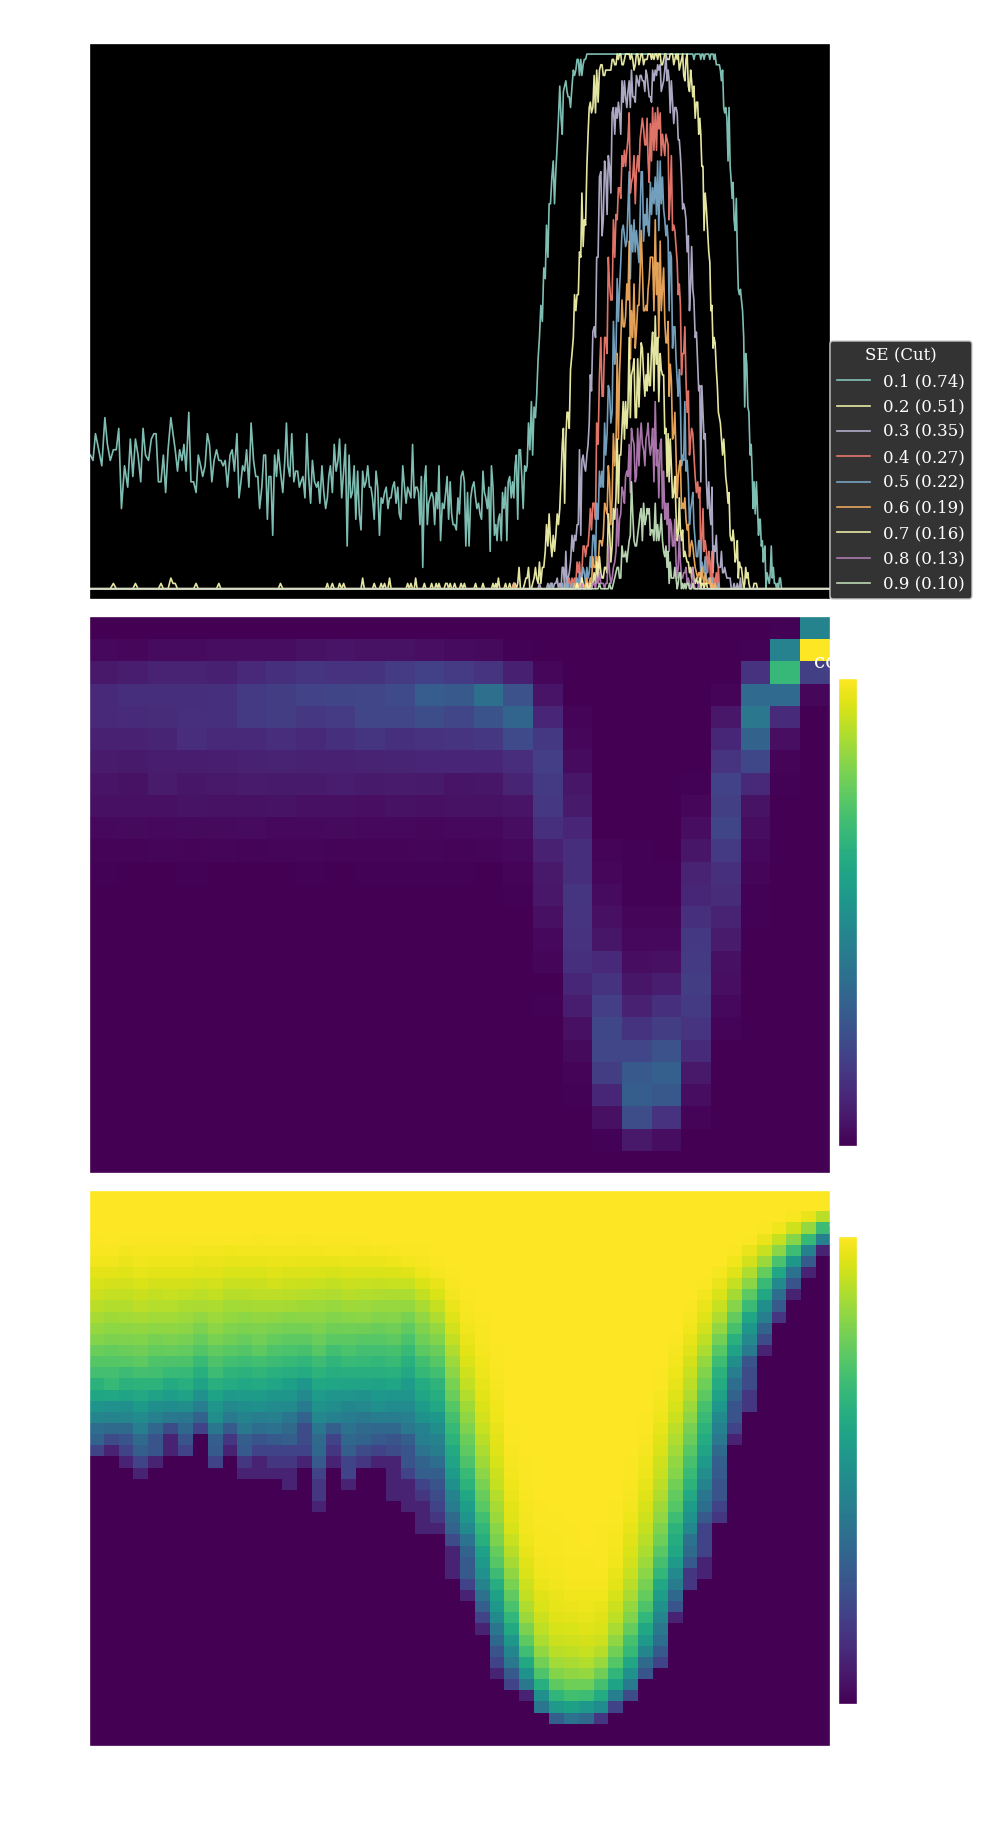

Entering Training...
Epoch:0100/0200  (79.1 s)
 Train: loss:0.1334, acc:78% || Val: loss: 0.1672, acc:77%, R50: 11.0484, 1/JSD: 4.1689
Epoch:0200/0200  (152.9s)
 Train: loss:0.1332, acc:78% || Val: loss: 0.1611, acc:78%, R50: 11.1589, 1/JSD: 3.8421


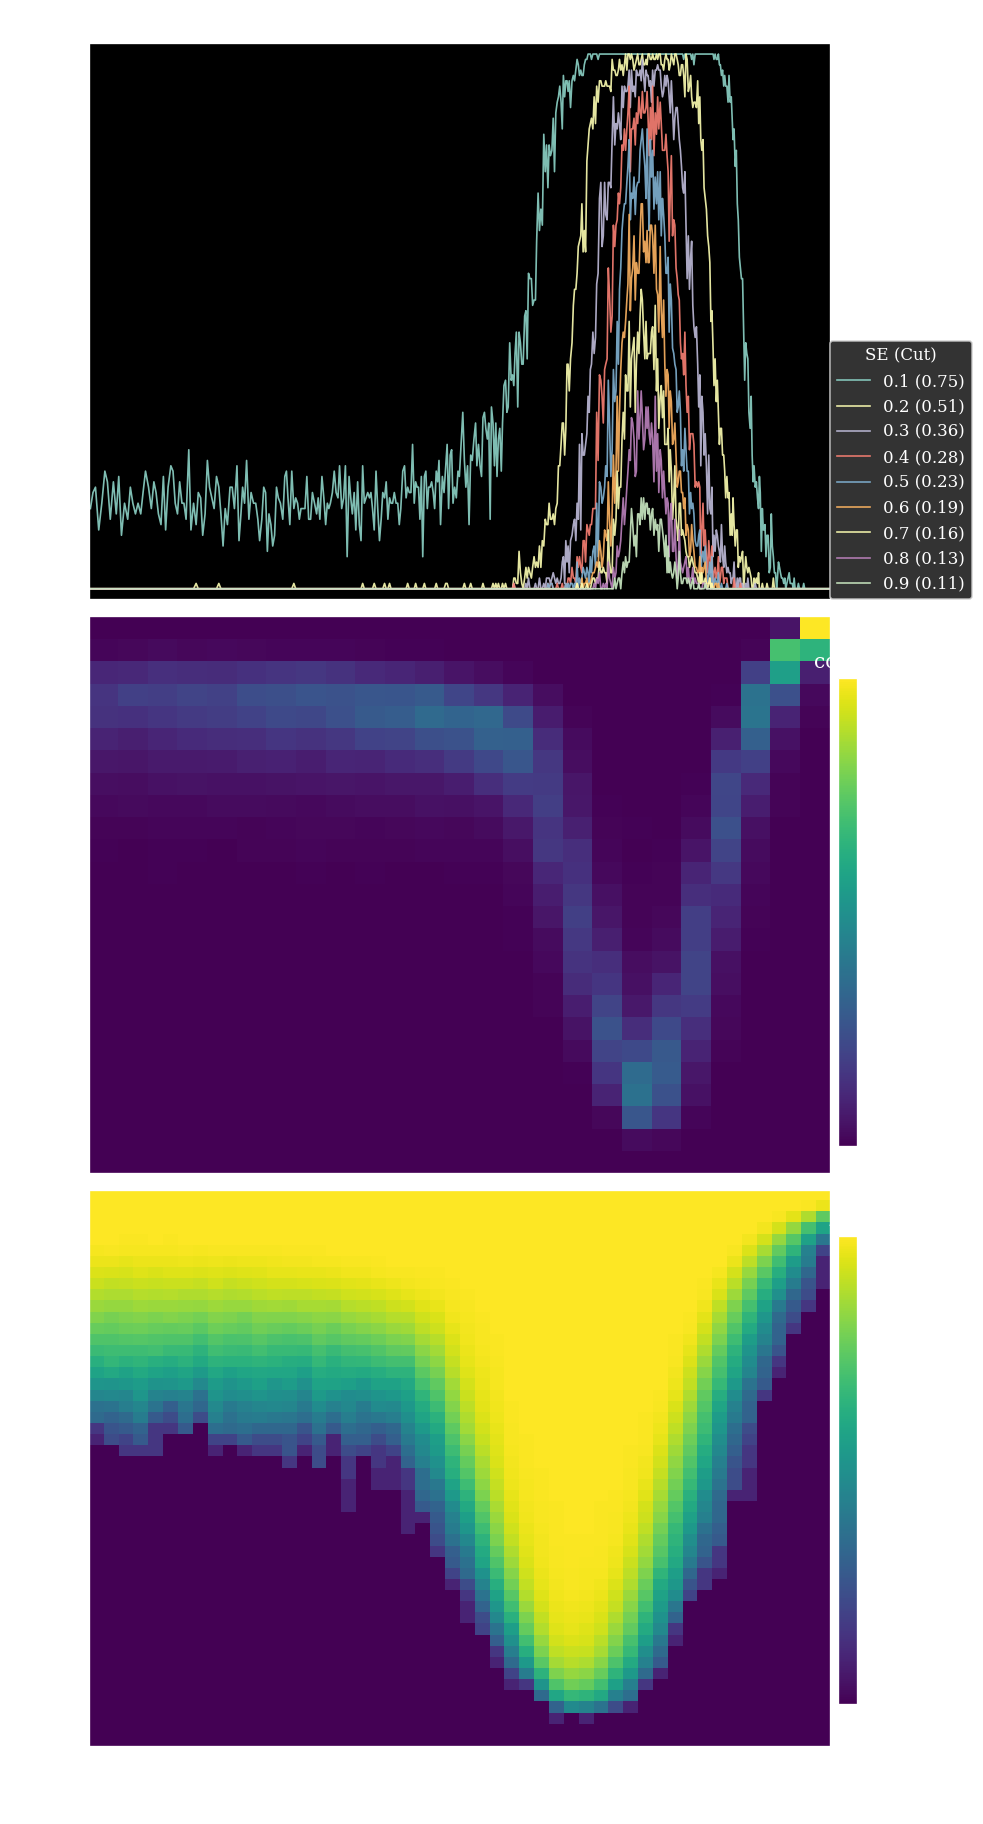

Entering Training...
Epoch:0100/0200  (65.0 s)
 Train: loss:0.1145, acc:78% || Val: loss: 0.1709, acc:77%, R50: 10.7989, 1/JSD: 4.3103
Epoch:0200/0200  (130.7s)
 Train: loss:0.1177, acc:77% || Val: loss: 0.1624, acc:78%, R50: 11.1589, 1/JSD: 3.8903


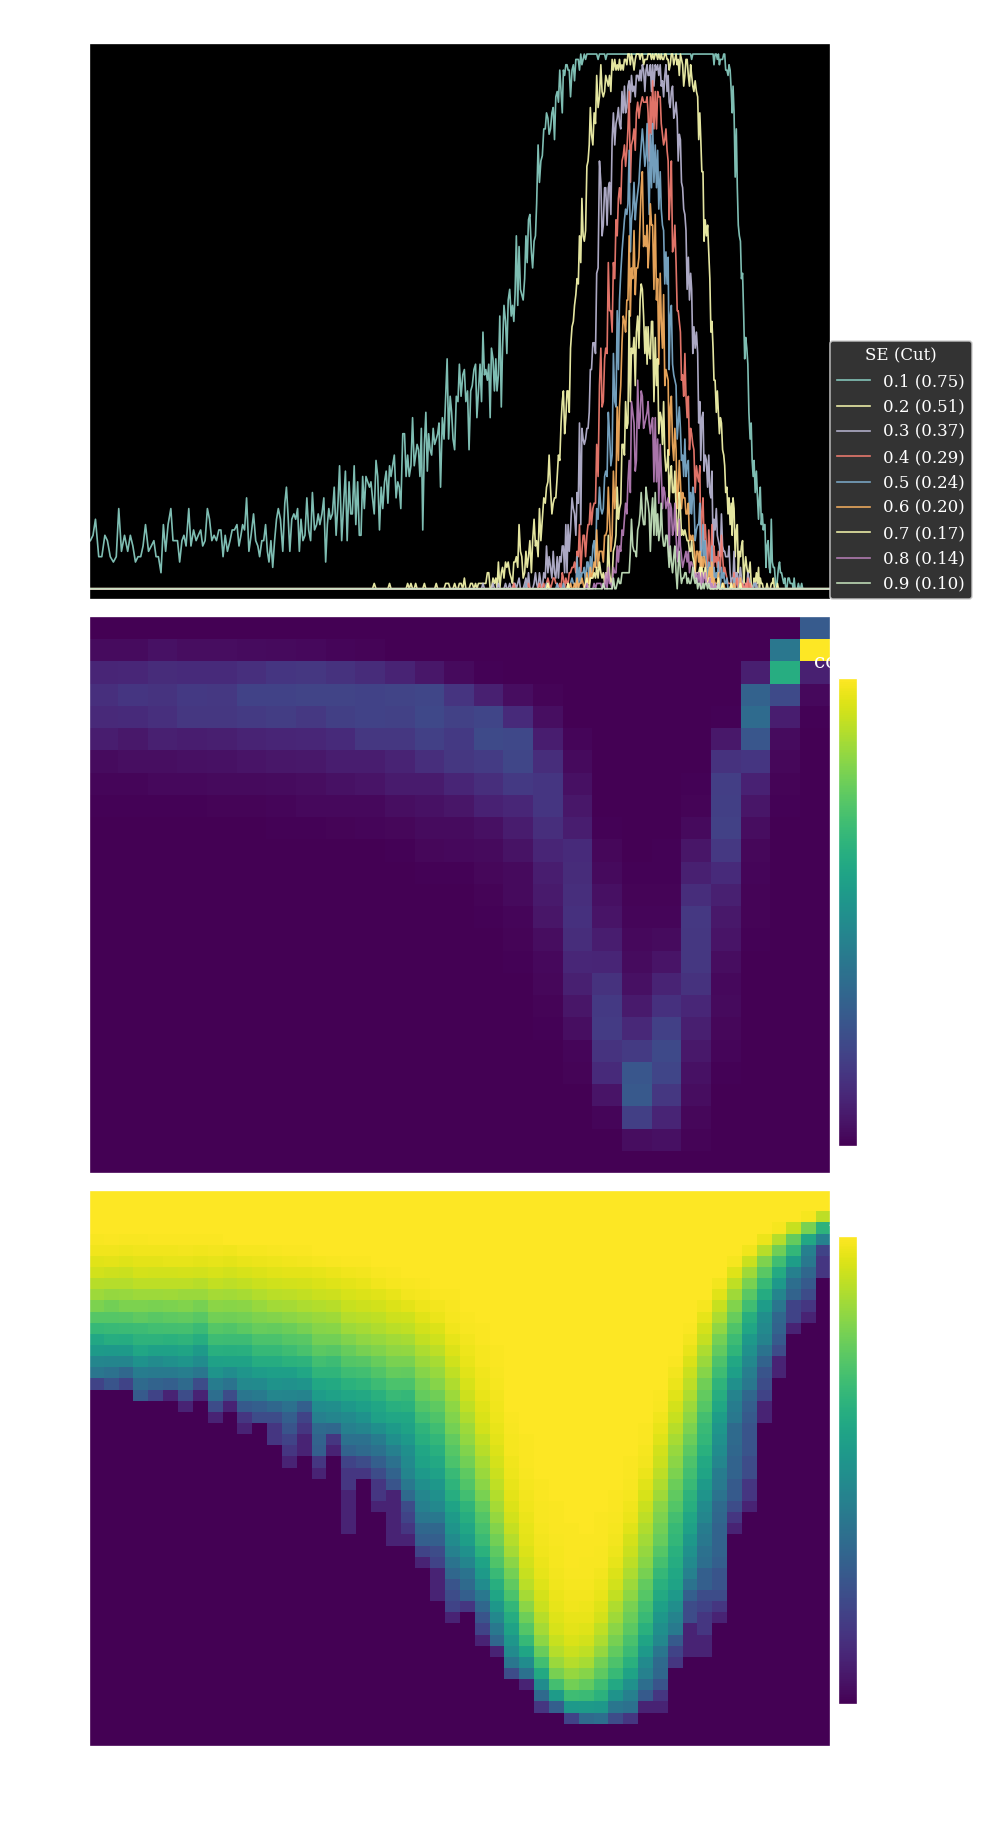

Entering Training...
Epoch:0100/0200  (71.6 s)
 Train: loss:0.0745, acc:70% || Val: loss: 0.2049, acc:69%, R50: 5.5857, 1/JSD: 12.0793
Epoch:0200/0200  (139.3s)
 Train: loss:0.0917, acc:78% || Val: loss: 0.1723, acc:77%, R50: 10.6954, 1/JSD: 4.8373


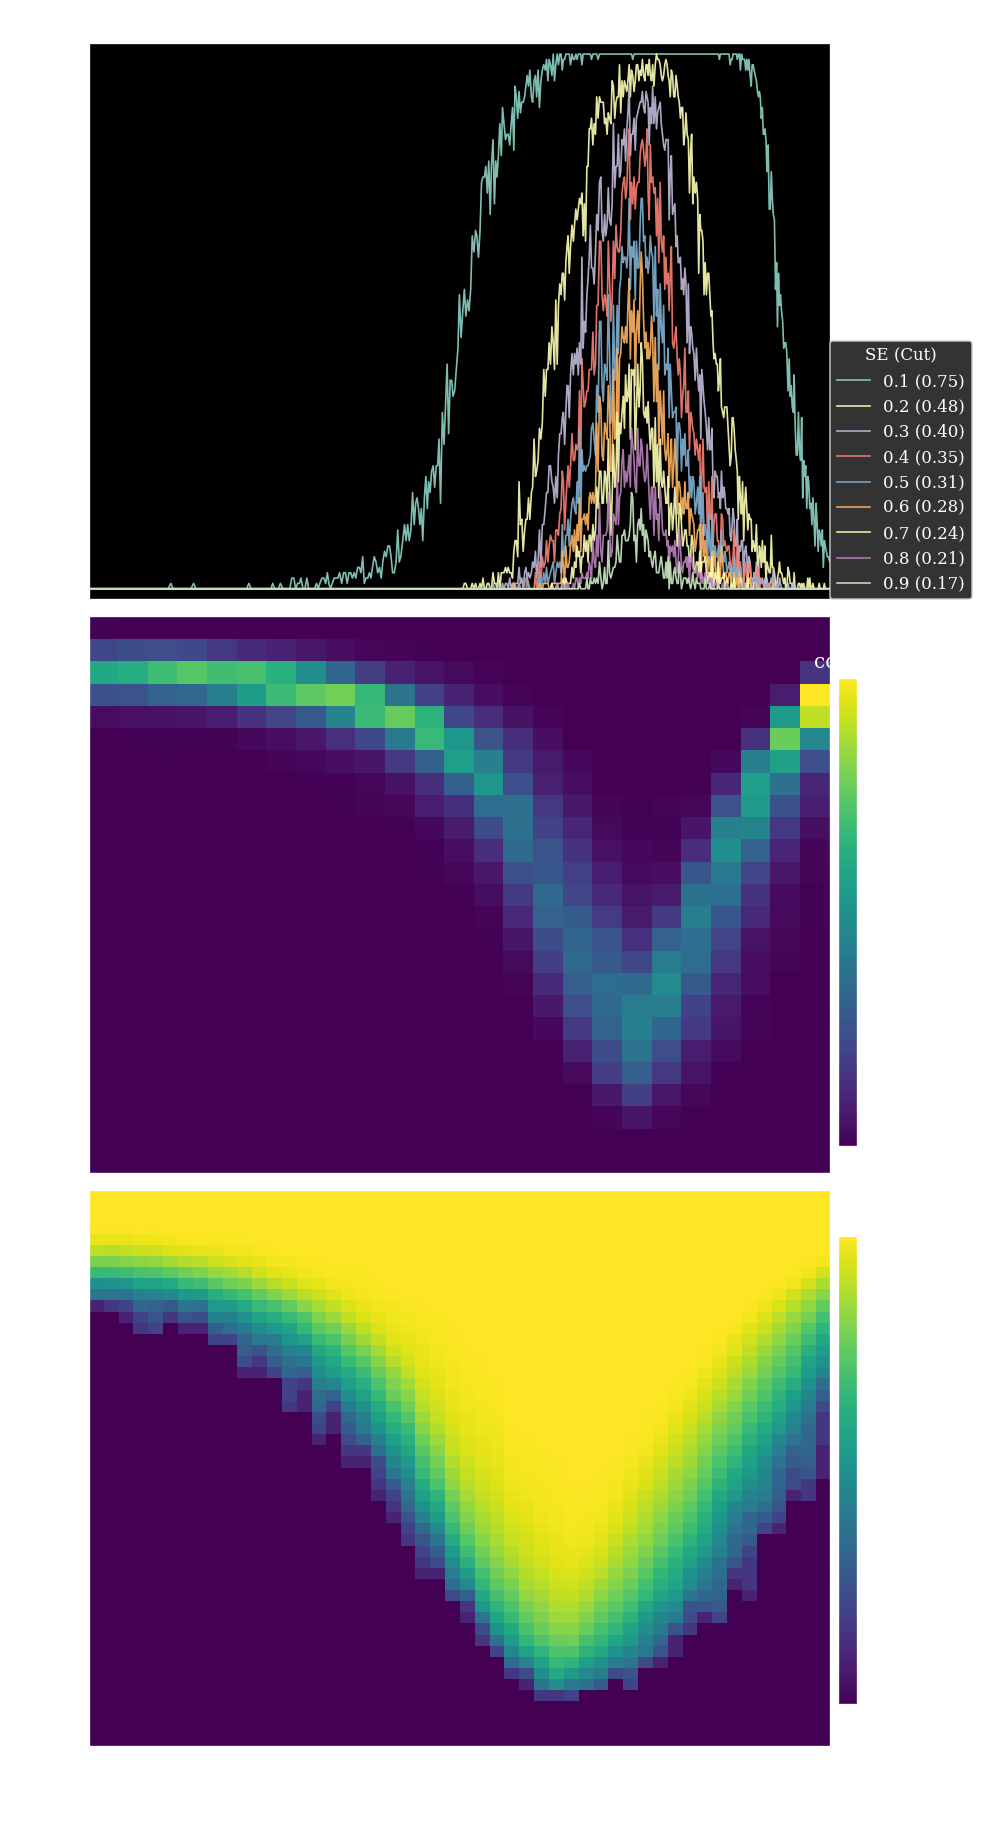

Entering Training...
Epoch:0100/0200  (66.2 s)
 Train: loss:0.0559, acc:69% || Val: loss: 0.2072, acc:68%, R50: 5.4082, 1/JSD: 12.2914
Epoch:0100/0200  (42.3 s)
 Train: loss:0.0253, acc:66% || Val: loss: 0.2257, acc:65%, R50: 4.1059, 1/JSD: 6.6144
Epoch:0200/0200  (92.1 s)
 Train: loss:0.0261, acc:68% || Val: loss: 0.2099, acc:67%, R50: 4.9644, 1/JSD: 7.0652


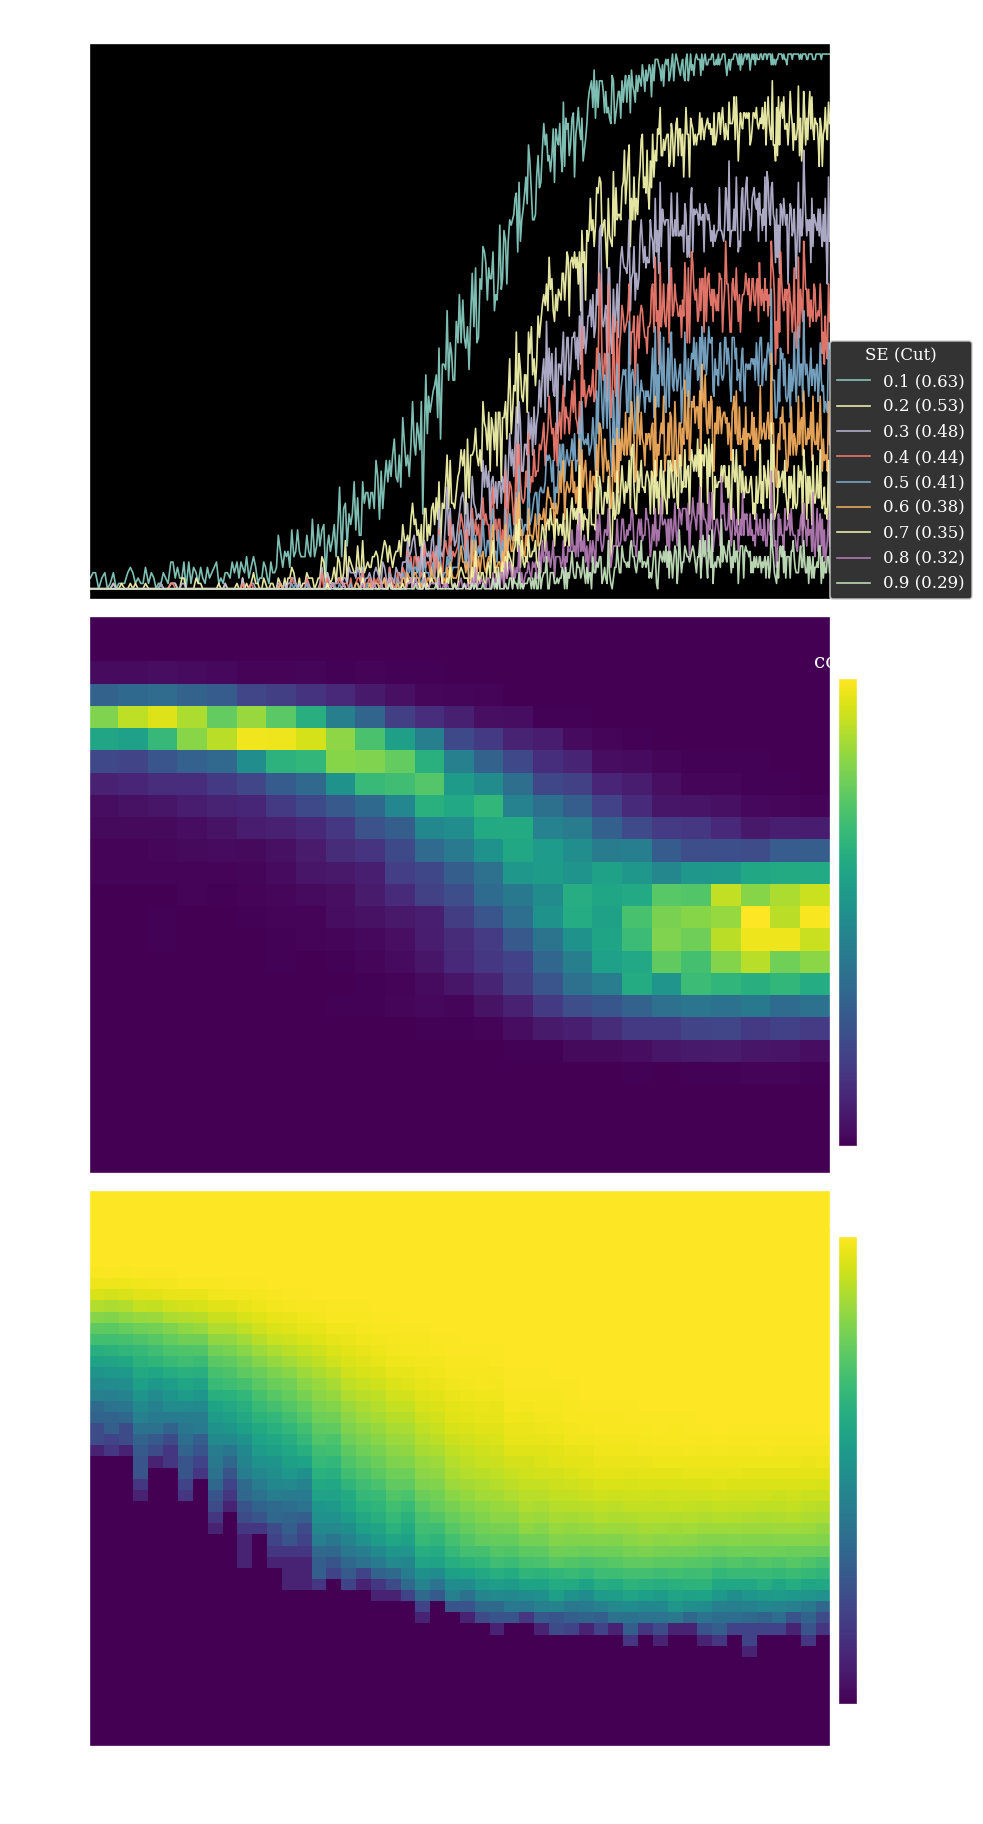

Entering Training...
Epoch:0100/0200  (42.8 s)
 Train: loss:0.0192, acc:64% || Val: loss: 0.2378, acc:65%, R50: 3.6680, 1/JSD: 5.9153
Epoch:0200/0200  (84.9 s)
 Train: loss:0.0182, acc:66% || Val: loss: 0.2230, acc:66%, R50: 4.1312, 1/JSD: 6.0491


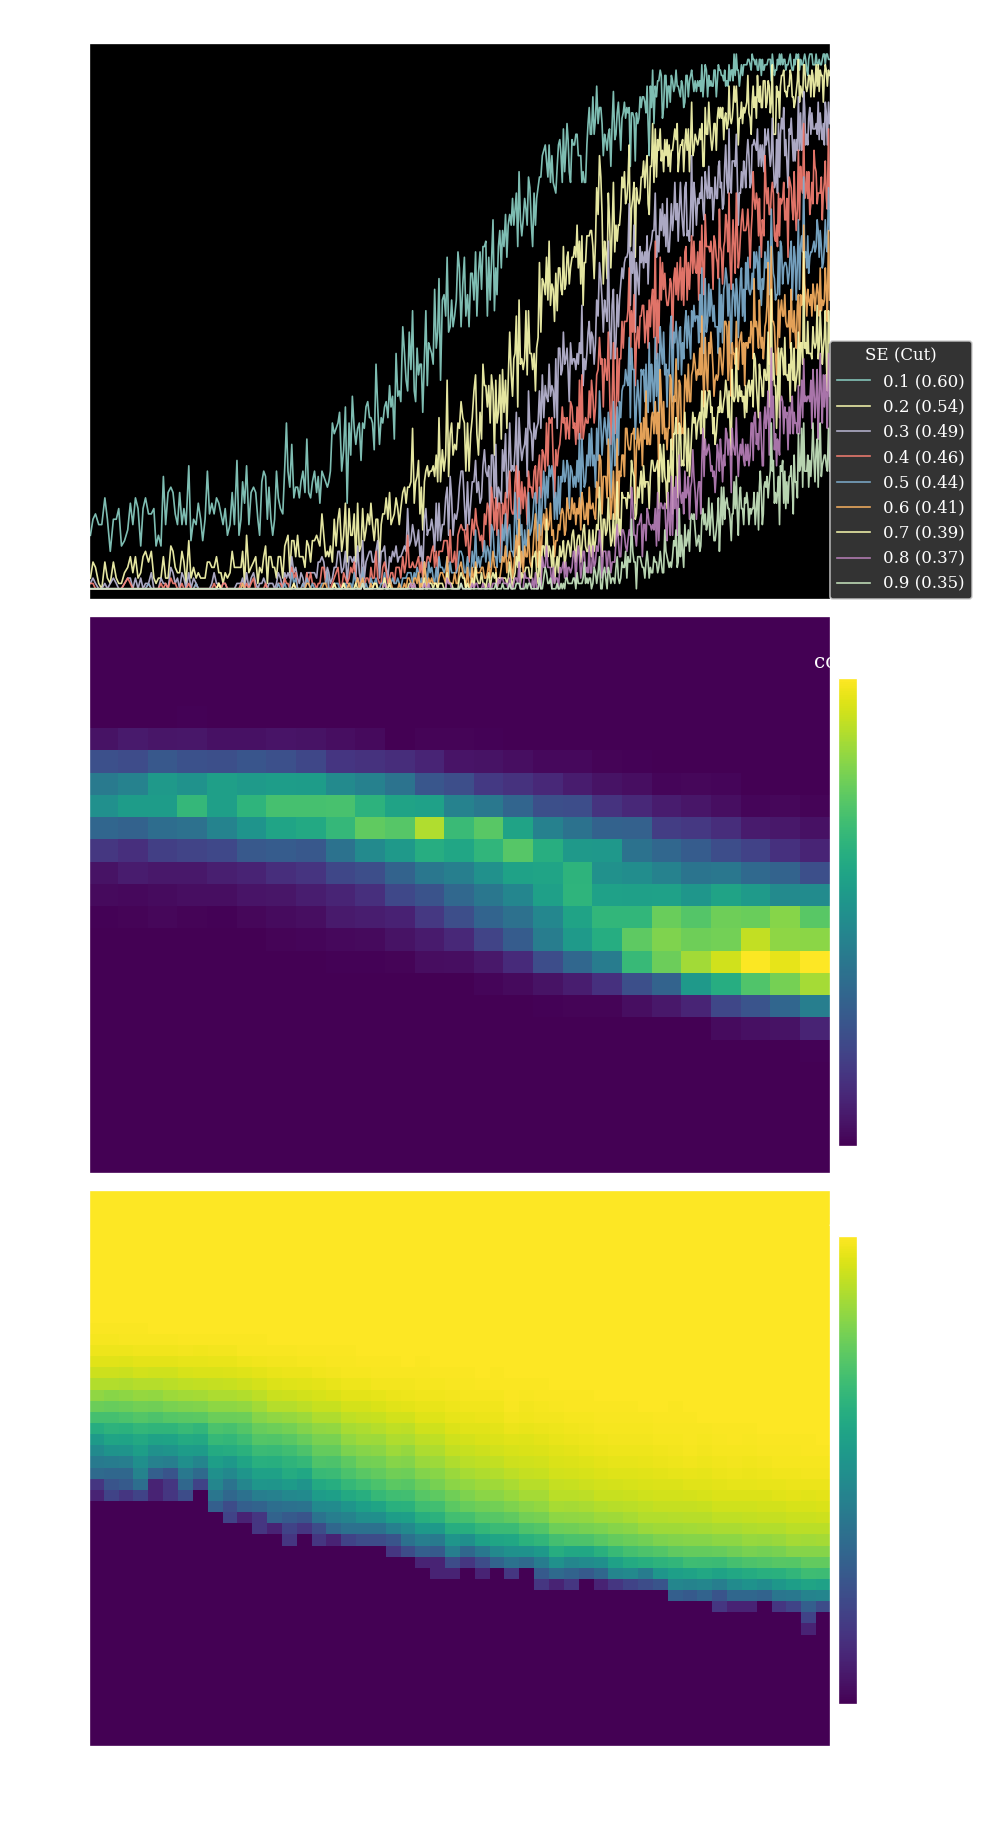

Entering Training...
Epoch:0100/0200  (49.8 s)
 Train: loss:0.0123, acc:61% || Val: loss: 0.2455, acc:61%, R50: 3.5005, 1/JSD: 115.9239
Epoch:0200/0200  (95.4 s)
 Train: loss:0.0123, acc:62% || Val: loss: 0.2384, acc:63%, R50: 4.0269, 1/JSD: 18.3657


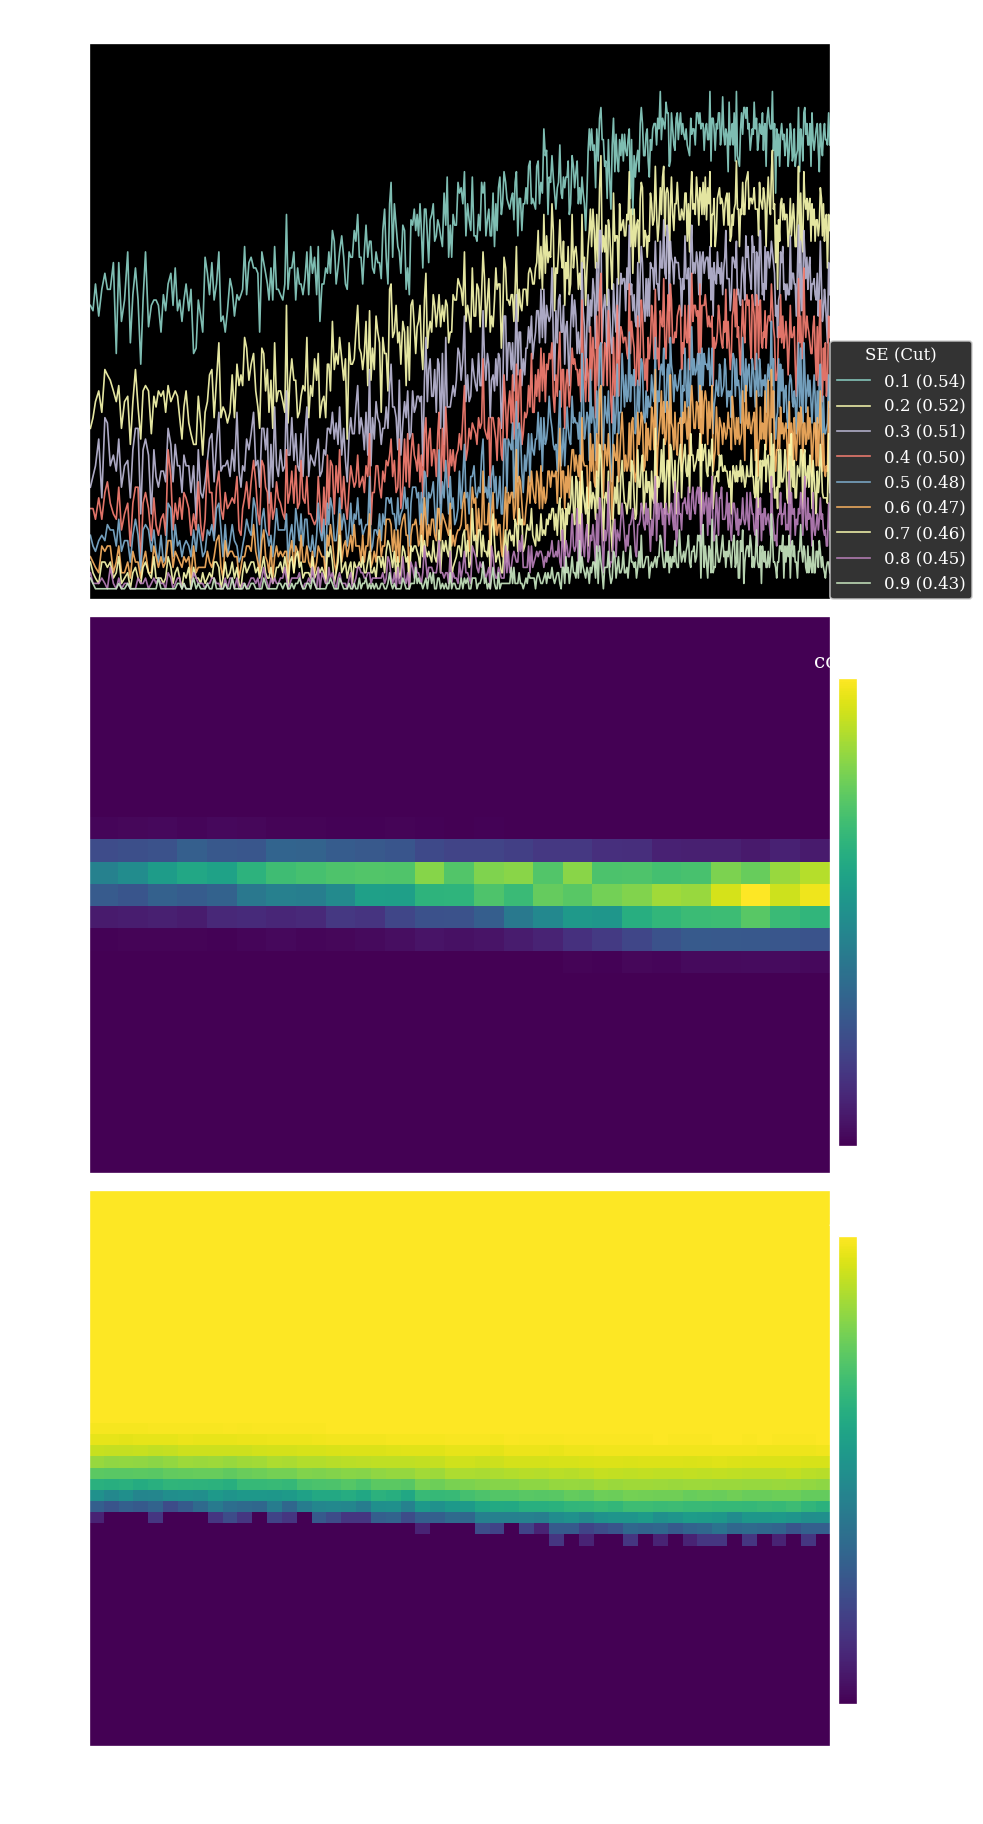

In [6]:
torch.manual_seed(69)
efficiencies = np.linspace(0.1,0.9,9)
for strength in [0,0.5,1,2,3,5,10,15,20]:
    frac = strength/(1+strength)
    metrics_train_legendre = Metrics()
    metrics_val_legendre = Metrics(validation=True)
    model_legendre = Classifier(input_size=4)
    model_legendre.loss = FlatLoss(frac=frac,labels=y_train,bins=128,
                                   background_only=True,norm='L2',recalculate=False)
    model_legendre.fit(traindataset=traindataset,
                       valdataset=valdataset,
                       **params,
                       optimizer=torch.optim.SGD(model_legendre.parameters(),lr=1e-1,momentum=0.),
                       #scheduler=scheduler,
                       log = logger,
                       metrics=[metrics_train_legendre,metrics_val_legendre])
    
    validation_predictions = np.array(model_legendre.yhat_val.tolist()).flatten()
    cuts = []
    for eff in efficiencies:
        cuts.append(find_threshold(validation_predictions,(y_val==0),eff))
    
    
    scores = np.array(model_legendre(testTensor).tolist()).reshape(-1,100)
    m = m_t.reshape(-1,100).mean(axis=1)
    F_s = []
    for s in scores.reshape(50,-1):
        density = np.histogram(s,bins=50,range=(0,1))[0]
        F_s.append(np.cumsum(density)/density.sum())
    F_s = np.array(F_s).T
    fig, [ax1, ax2, ax3]  = plt.subplots(3,1,figsize=[8,5*3],dpi=120,sharex=True)
    for j,cut in enumerate(cuts):
        c = f"C{j}" if j!= 6 else f"C11"
        passed = (scores<cut).sum(axis=1)/scores.shape[1]
        ax1.plot(m,passed,label="{:0.1f} ({:0.2f})".format(efficiencies[j],cut),alpha=0.9,c=c,lw=1)

    ax1.set_ylabel(r"$\mathrm{passing\, events}/\mathrm{events\,in\, bin}$",fontsize=17)
    ax1.set_ylim([-0.02,1.02])
    ax1.set_title("(strength: {:.02f}, acc: {:.02})".format(strength, metrics_val_legendre.accs[-1]),fontsize=17)
    ax1.legend(loc=(1,0),markerscale=5,title="SE (Cut)",ncol=1)

    _,_,_,h = ax2.hist2d(m_t,scores.flatten(),bins=25, label="all",cmap='viridis',range=[[-1,1],[0,1]])
    cbaxes = fig.add_axes([0.86, 0.37, 0.02, 0.26]) 
    cb = plt.colorbar(h,ax=ax2,cax = cbaxes)
    cb.ax.set_title("counts")
    ax2.set_ylabel(r"$s$",fontsize=17)

    im = ax3.imshow(F_s,label="all",origin='lower',extent=[-1,1,0,1],aspect="auto",norm=LogNorm(),cmap=my_cmap)
    ax3.set_ylabel(r"$s$",fontsize=17)

    cbaxes = fig.add_axes([0.86, 0.06, 0.02, 0.26]) 
    cb = plt.colorbar(im,ax=ax3,cax = cbaxes)
    cb.ax.set_title(r"$F(s)$")
    ax3.set_xlabel(r"$m$",fontsize=19)

    fig.tight_layout(pad=0)
    plt.show()